<a href="https://colab.research.google.com/github/lyloc-logtech/ai-code/blob/main/nhandienbonghoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '/content/drive/MyDrive/drive-download-20250414T061518Z-001/flower'
img_width, img_height = 128,128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(img_width, img_height),batch_size=batch_size,class_mode='categorical')

model = Sequential([Conv2D(32, (3,3), activation='relu', input_shape = (img_width, img_height, 3)),MaxPooling2D((2,2)),Conv2D(64, (3,3), activation='relu'),MaxPooling2D((2,2)),Conv2D(128, (3,3), activation='relu'),MaxPooling2D((2,2)),Flatten(),Dense(256, activation='relu'),Dense(128, activation='relu'),Dense(5, activation='softmax')])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=50)
model.save('bong_hoa.keras')

Found 500 images belonging to 5 classes.
Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.3516 - loss: 1.5294
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5903 - loss: 1.0188
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6503 - loss: 0.9229
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6323 - loss: 0.8811
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7380 - loss: 0.7160
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7310 - loss: 0.8086
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.7302 - loss: 0.7240
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6858 - loss: 0.8100
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7443 - loss: 0.6691
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7546 - loss: 0.6503
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7555 - loss: 0.6154
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━

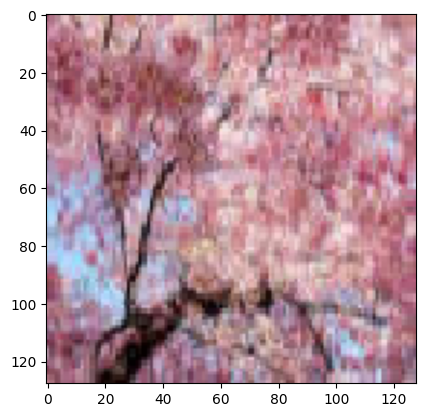

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
{'bong_hoa:cherry blossom ( hoa anh đào)'}


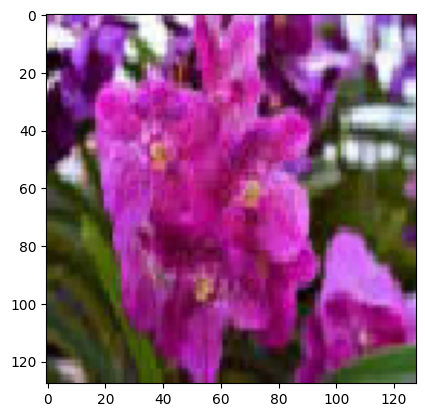

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
{'bong_hoa:orchid ( hoa lan)'}


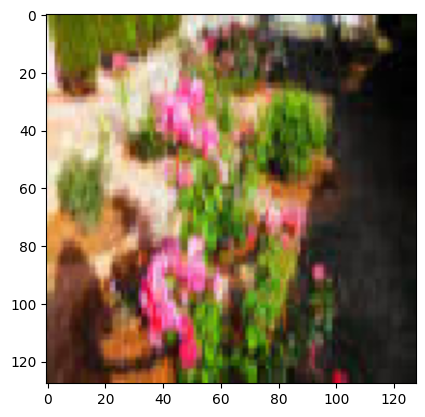

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
{'bong_hoa:rose ( hoa hồng)'}


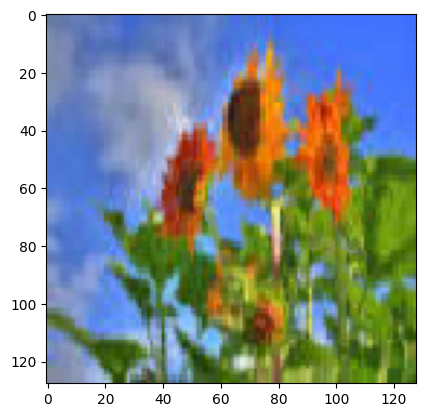

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
{'bong_hoa:sunflower (hoa hướng dương)'}


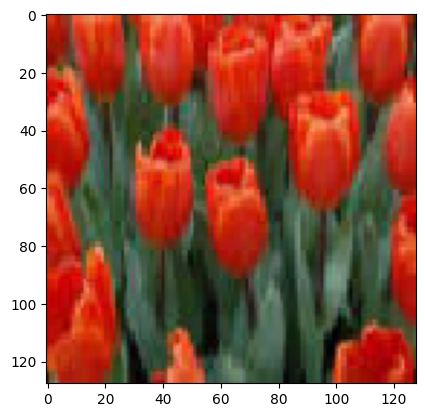

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
{'bong_hoa:tulip ( hoa tulip)'}


In [6]:
from keras.utils import load_img
import numpy as np
paths= ('/content/drive/MyDrive/drive-download-20250414T061518Z-001/flower/cherry blossom ( hoa anh đào)/1 (1).jpg',
        '/content/drive/MyDrive/drive-download-20250414T061518Z-001/flower/orchid ( hoa lan)/2 (1).jpg',
        '/content/drive/MyDrive/drive-download-20250414T061518Z-001/flower/rose ( hoa hồng)/3 (1).jpg',
        '/content/drive/MyDrive/drive-download-20250414T061518Z-001/flower/sunflower (hoa hướng dương)/4 (1).jpg',
        '/content/drive/MyDrive/drive-download-20250414T061518Z-001/flower/tulip ( hoa tulip)/5 (1).jpg')
for image_path in paths:
  img = load_img(image_path, target_size=(128,128))
  plt.imshow(img)
  plt.show()
  img_array= np.array(img)
  img_array= img_array.reshape((1,128,128,3))
  prediction= np.argmax(model.predict(img_array))
  class_labels={v:k for k,v in train_generator.class_indices.items()}
  banknote_name= class_labels[prediction]
  print({f'bong_hoa:{banknote_name}'})